Plot the locations of the profiles for the different regions. 

In [1]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.rcParams.update({'font.size': 16})
plt.rc('figure', facecolor='w')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry3/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [2]:
logger = logging.getLogger("EMODnet-Chemistry-Data-positions")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [36]:
datadir = "/data/EMODnet/Eutrophication/Residuals/All/excludelist"
figdir = "../figures/EMODnet2021/outliers/"

if not os.path.exists(figdir):
    os.makedirs(figdir)

varlist = ["phosphate", "silicate", "ammonium", "chlorophyll-a", 
           "dissolved_inorganic_nitrogen", "dissolved_oxygen"]

In [44]:
for varname in varlist:
    # Generate list of files
    filelist = glob.glob(os.path.join(datadir, f"exclude*{varlist[1]}*"))
    logger.info(len(filelist))
    print(filelist)

INFO:EMODnet-Chemistry-Data-positions:5
INFO:EMODnet-Chemistry-Data-positions:5
INFO:EMODnet-Chemistry-Data-positions:5
INFO:EMODnet-Chemistry-Data-positions:5
INFO:EMODnet-Chemistry-Data-positions:5
INFO:EMODnet-Chemistry-Data-positions:5


['/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Mediterranean_Sea.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Arctic_Sea.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Atlantic.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Baltic.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Black_Sea.csv']
['/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Mediterranean_Sea.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Arctic_Sea.csv', '/data/EMODnet/Eutrophication/Residuals/All/excludelist/exclude_Water_body_silicate_monthly_residuals_Atlantic.csv', '/data/EMODnet/Eutrophication/Residuals/A

In [30]:
domain = [-42.0, 10, 10, 70.0]
m = Basemap(projection='merc', llcrnrlon=domain[0], llcrnrlat=domain[2],
            urcrnrlon=domain[1], urcrnrlat=domain[3],
            lat_ts=0.5 * (domain[2] + domain[3]), resolution='i')

In [34]:
def read_excluded_coords(datafile: str):
    """
    Read the coordinates from a CSV file 
    """
    lon = []
    lat = []
    with open(datafile, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            lon.append(float(row[0]))
            lat.append(float(row[1]))
            
    return lon, lat

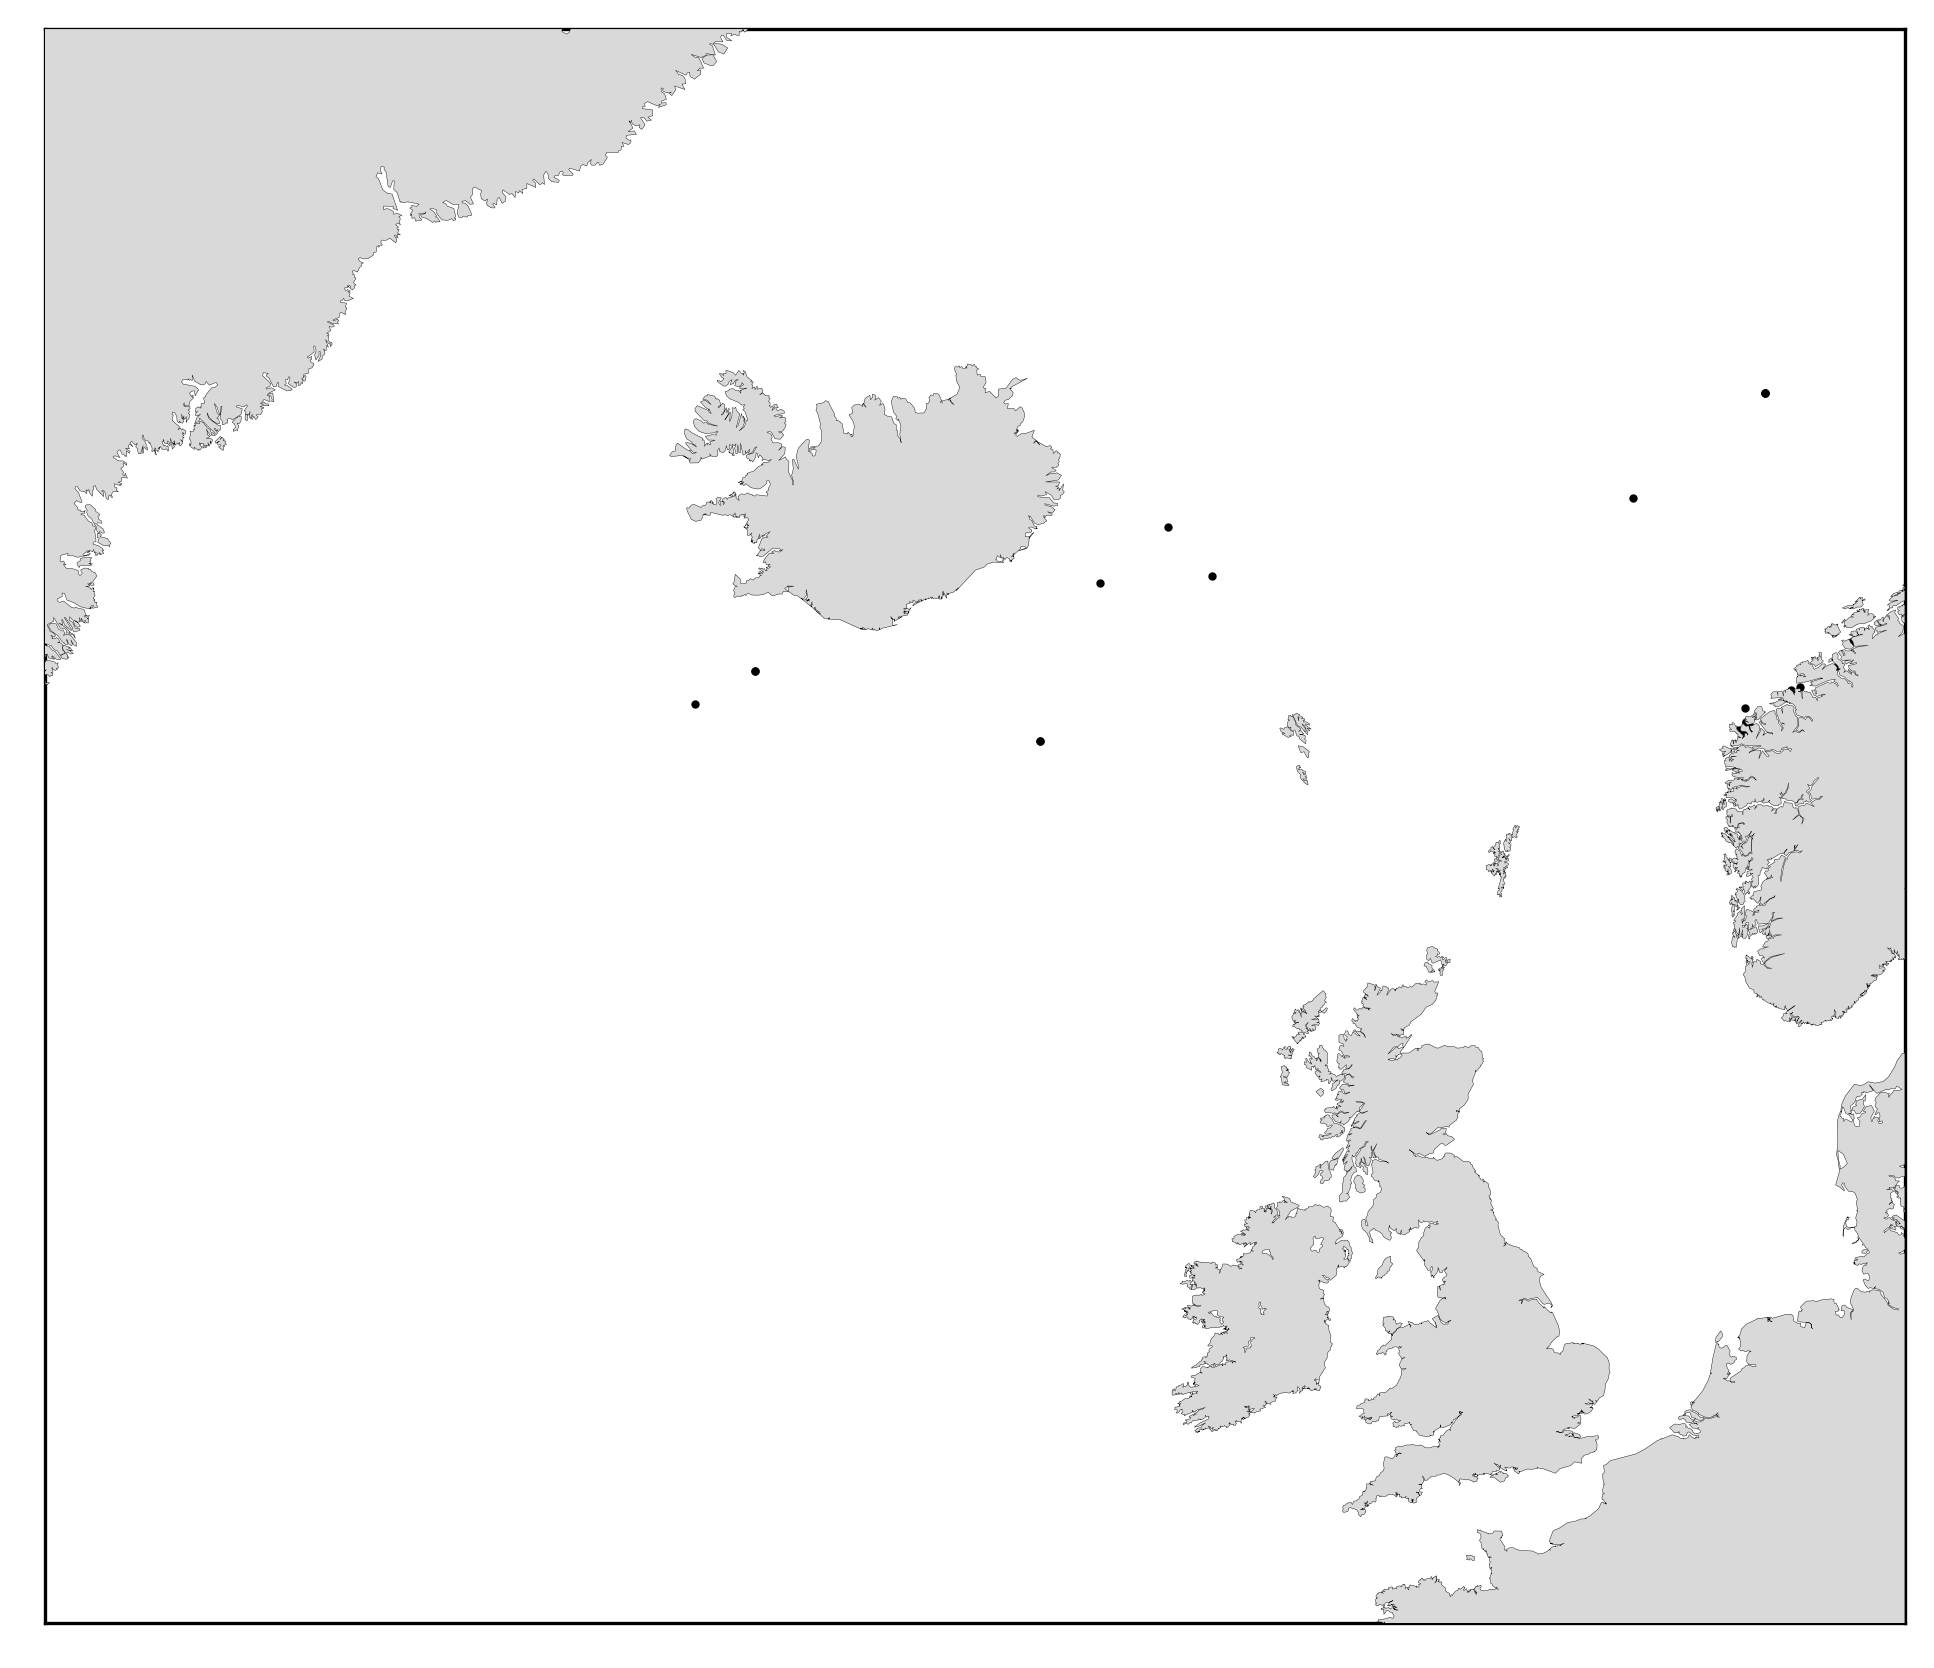

In [32]:
fig = plt.figure(figsize=(8, 12))

ax = plt.subplot(111)
m.plot(lon, lat, "ko", ms=1, latlon=True)
m.fillcontinents(color=".85", zorder=3)
m.drawcoastlines(linewidth=0.1, zorder=4)

#plt.savefig(os.path.join(figdir, f"data_{varname}_month_{mmm}_2"), 
#            dpi=300, bbox_inches="tight", facecolor="w",
#                    transparent=False)
plt.show()
fig.clf()

## Specific plot for the Arctic Sea

In [14]:
varname = varlist[-1]
datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
datafile = datafilelist[0]
logger.info("Working on file {}".format(datafile))

INFO:EMODnet-Chemistry-Data-positions:Working on file /data/EMODnet/Eutrophication/Split/ArcticSea_Water_body_dissolved_oxygen_concentration.nc


In [29]:
with netCDF4.Dataset(datafile) as nc:
    obslon = nc.variables["obslon"][:]
    obslon[obslon > 180] -= 360.
    obslat = nc.variables["obslat"][:]
    obsdepth = nc.variables["obsdepth"][:]
    obstime = nc.variables["obstime"][:]
    fieldname = list( nc.variables.keys())[-1]
    obsval = nc.variables[fieldname][:]

In [35]:
gooddepth = np.where(obsdepth < 2)[0]

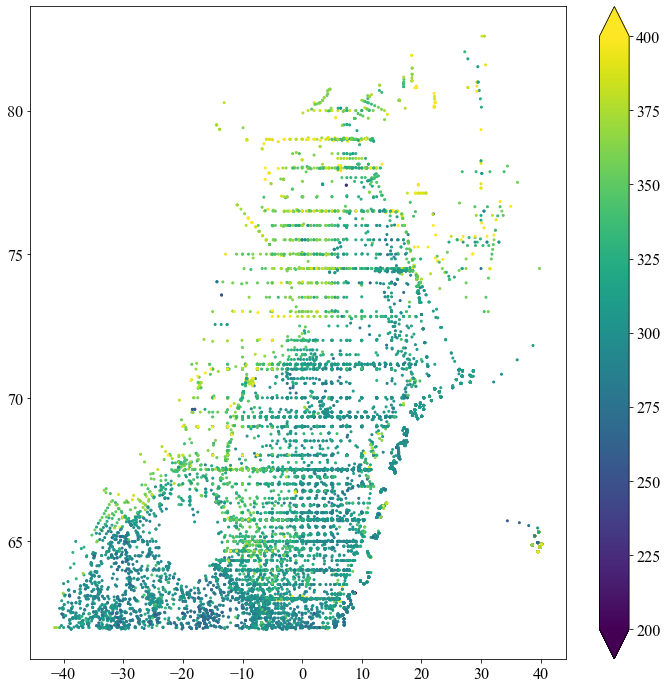

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
plt.scatter(obslon[gooddepth], obslat[gooddepth], s=4, c=obsval[gooddepth], vmin=200., vmax=400.)
plt.colorbar(extend="both")
plt.show()
plt.close()